In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
df = pd.read_csv("accel.csv", header=None)
df.columns = ["millis", "time", "x", "y", "z"]
#del df['millis']

In [5]:
#df["time"] = df["time"].apply(lambda x: x/1000); # millis to seconds

In [38]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', 4):
    #print(df)
df


,millis,time,x,y,z
0,6570,2017-3-7T4:37,9,0,89
1,6825,2017-3-7T4:37,10,0,90
2,7080,2017-3-7T4:37,9,0,91
3,7838,2017-3-7T4:37,10,0,91
4,8093,2017-3-7T4:37,11,0,90
5,8348,2017-3-7T4:37,11,0,89
6,8899,2017-3-7T4:37,13,2,89
7,9154,2017-3-7T4:37,14,2,90
8,9410,2017-3-7T4:37,15,2,90
9,9998,2017-3-7T4:37,16,1,90


In [7]:
#df.plot(figsize=(20,10), colormap='Accent')
len(df)

561156

In [8]:
#df = df[0:100000]
#plt.figure(figsize=(20,10))
#with pd.plot_params.use('x_compat', True):
        #df.x.plot()
        #df.y.plot()
        #df.z.plot()

In [9]:
interp = True
#plt.figure(figsize=(20,10))
#sns.tsplot(df.x, df.index, interpolate=interp, color="red")
#sns.tsplot(df.y, df.index, interpolate=interp, color="blue")
#sns.tsplot(df.z, df.index, interpolate=interp, color="green")


In [11]:
roll = 10
mean = df.rolling(roll).mean()
std = df.rolling(roll).std()

collected_mean = mean.x + mean.y + mean.z
collected_std = std.x + std.y + std.z

df['mean'] = collected_mean

list_x = list(std.x)
max_std = list_x.index(np.nanmax(list_x))
len(df)
print(max_std)


380138


In [ ]:
plt.figure()
df.plot(figsize=(700,10))
df.plot(figsize=(700,10)).x.rolling(10).std().plot()
#plt.fill_between(df.index, collected_mean-.5*collected_std, collected_mean+.5*collected_std, color='b', alpha=0.2)

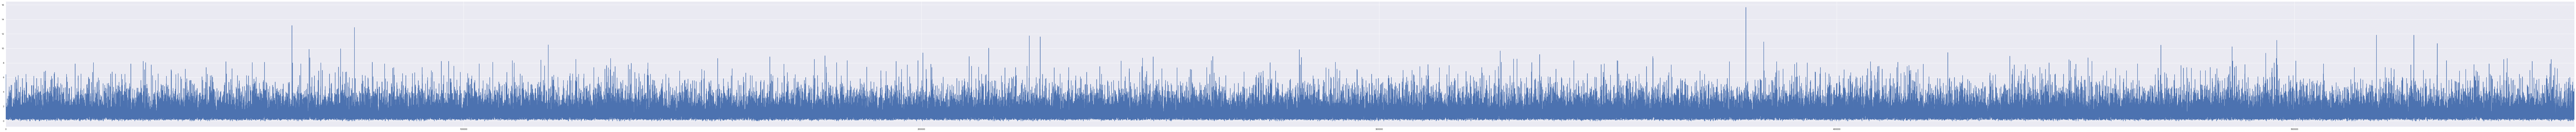

In [39]:
std = df.x.rolling(roll).std().pow(2)
std.plot(figsize=(200,10))

In [29]:
print("Hello")

Hello
